# Ch. 1 

* gradient boosting for shallow learning problems 
* deep learning for perceptual problems 

on page 22 on 1/20/24

In [1]:
import numpy as np 

In [28]:
x = np.random.uniform(-5,5, (4,4))
y = np.random.uniform(-5,5, (4,4))

In [22]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
            
    return x

In [30]:
naive_relu(x)

array([[2.84252693, 0.        , 1.96052552, 0.91985948],
       [0.        , 3.37685683, 0.        , 2.11250857],
       [3.13430744, 0.        , 0.        , 0.        ],
       [0.        , 4.78287969, 0.        , 0.        ]])

In [31]:
def naive_add(x, y):
    
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
            
    return x

In [32]:
naive_add(x,y)

array([[ 2.63696977, -2.30371666,  4.12741541, -3.06515319],
       [-0.13951455,  1.32102723, -5.60457475,  4.73492214],
       [ 1.79633823, -6.29120227, -2.33763904, -8.44410818],
       [-2.1028077 ,  8.60946413, -6.65281469, -7.59659039]])

In [33]:
z = x + y # element wise addition in numpy 
z = np.maximum(x, 0) # numpy implemented relu

In [47]:
q = z.copy()
q.shape

(4, 4)

In [50]:
q.reshape((16,1)).shape

(16, 1)

In [57]:
A = np.array([[1,5], [7,1]])
A.transpose()

array([[1, 7],
       [5, 1]])

On p. 46, ch. 2.4 on 1/22/24

# Example 1 - imdb classification

In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
# there are a bunch of words associated with one review 
train_labels[0]

1

In [4]:
# decode review 0 back to english 
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
len(decoded_review.split())

218

In [6]:
len(train_data[0]) # so each word corresponds to an index in training data.

218

In [7]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results 

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build the model

- outputting probabilities, so use `binary_crossentropy`

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/willtirone/anaconda3/envs/torch/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# validation set 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6955 - loss: 0.5945 - val_accuracy: 0.8633 - val_loss: 0.3933
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8988 - loss: 0.3358 - val_accuracy: 0.8852 - val_loss: 0.3091
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9218 - loss: 0.2458 - val_accuracy: 0.8879 - val_loss: 0.2835
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9371 - loss: 0.1979 - val_accuracy: 0.8887 - val_loss: 0.2762
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9501 - loss: 0.1589 - val_accuracy: 0.8833 - val_loss: 0.2926
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9575 - loss: 0.1369 - val_accuracy: 0.8864 - val_loss: 0.2898
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9693 - loss: 0.1118 - val_accuracy: 0.8838 - val_loss: 0.3043
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9759 - loss: 0.0907 - val_accuracy: 0.8836 - v

In [49]:
history_dict = history.history
history_dict.keys() 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

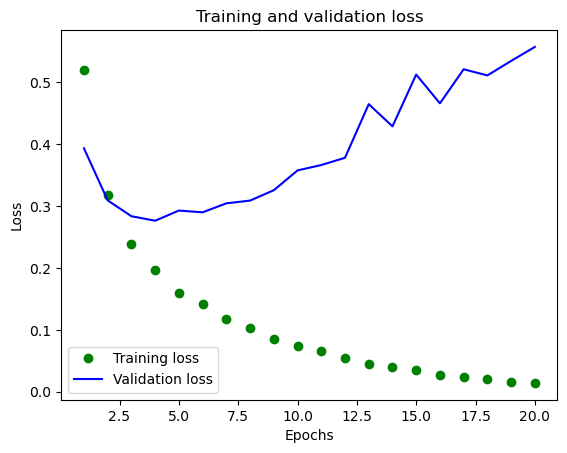

In [20]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

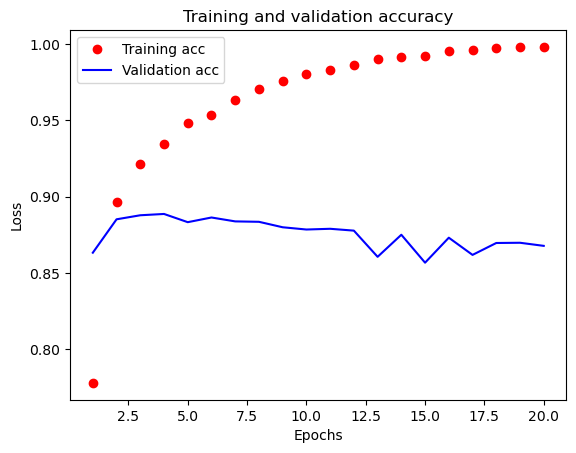

In [19]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# retrain from scracth with only 4 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7190 - loss: 0.5693
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9026 - loss: 0.2914
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9213 - loss: 0.2219
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9386 - loss: 0.1806
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8808 - loss: 0.2951


In [22]:
results

[0.2943442165851593, 0.8829523921012878]

In [26]:
# likelihood of test reviews being positive
model.predict(x_test)[[1,50,250]]

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.999944 ],
       [0.0039338],
       [0.340295 ]], dtype=float32)

stopping on 3.4.6 p. 77